# Análise do perfil acadêmico/demográfico + histórico escolar dos discentes do curso de computação
**Objetivo:** Realizar análises descritivas, exploratórias e inferenciais, além de aplicar testes estatísticos para validar hipóteses sobre evasão e desempenho dos estudantes do curso de Ciência da Computação.

### Súmario
1. [Carga e preparação dos dados](#dados)
    - 1.1. [Análise Exploratória](#eda)
2. [Perfil dos alunos](#perfil)
    - 2.1. [Distribuição por sexo, raça, faixa etária, estado civil, nacionalidade.](#distribuiçao)
    - 2.2. [Proporção de evasão vs conclusão por perfil demográfico.](#proporçao)
    - 2.3. [Análise de correlação entre coeficiente de rendimento e evasão.](#analise)
3. [Trajetória acadêmica](#trajetoria)
    - 3.1. [Taxa média de aprovação/reprovação por disciplina.](#taxa)
    - 3.2. [Identificação de disciplinas gargalo (com maior índice de reprovação).](#identificao)
    - 3.3. [Evolução do desempenho do aluno por período (notas e faltas).](#evolucao)
    - 3.4. [Relação entre reprovações acumuladas e evasão.](#relacao)
4. [Comparação entre grupos](#comp)
    - 4.1. [Diferenças no coeficiente de rendimento por sexo, raça, tipo de ingresso.](#difeCoeficiente)
    - 4.2. [Diferença entre evasão por forma de ingresso (ENEM, transferência, e tipos de Cotas).](#difeEvasao)
5. [Testes estatísticos recomendados](#teste)
    - 5.1. [Comparações de médias](#media)
    - 5.2. [Associação entre variáveis catégoricas](#associacao)
    - 5.3. [Correlação](#corr)
    - 5.4. [Comparação de distribuições](#comp)
    - 5.5. [Modelagem estatística](#model)
6. [Conclusão Final](#conclusao)

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime


<a id='dados'></a>
## 1. Carga e preparação dos dados
Nesta seção, carregamos os três datasets necessários (`alunos_ativos`, `alunos_inativos`, `historico_escolar`)

### Vamos utilizar os datasets
- **alunos_ativos.csv:** Contém informações sobre os alunos que estão atualmente ativos na instituição.
- **alunos_inativos.csv:** Conjunto de dados contém informações sobre os alunos que não estão mais ativos na instituição.
- **historico_escolar.csv:** Conjunto de dados detalha o histórico acadêmico dos alunos, com informações sobre as disciplinas cursadas.

In [3]:
alunosAtivos = pd.read_csv('alunos_ativos.csv')
alunosInativos = pd.read_csv('alunos_inativos.csv') 
histEscolar = pd.read_csv('historico_escolar.csv')

<a id='eda'></a>
### 1.1 Análise Exploratória (EDA)
Realizamos uma análise exploratória para entender a distribuição dos dados, verificar valores nulos, duplicados e tratar inconsistências.

In [4]:
display(alunosAtivos.head())
display(alunosInativos.head())
display(histEscolar.head())

,Data Nascimento,Sexo,Raça,Estrangeiro,Nacionalidade,Naturalidade,UF Naturalidade,Período,Situação atual,Data ocorrência,Estrutura,Período ingresso,Tipo ingresso,IMI,Coeficiente,Tipo de demanda,rga_anonimo
0,2000-01-14,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,ARAGARCAS,GO,20232,MATRICULADO NO PERÍODO,2023-11-16,20191,20181,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),56.7,5.49,L6 - Estudante preto pardo ou indígena de esco...,af05b362ddb9224c4589b23cbf119b60ce7e26300b6a3a...
1,1997-04-26,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,SAO JOSE DO JACUIPE,BA,20232,AFASTAMENTO POR BLOQUEIO DE MATRICULA,2023-11-10,20191,20171,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),35.8,4.42,Ampla Concorrência,208844f5f871e3b92a344f0a6f7782b209872e5667ea13...
2,1999-09-04,Masculino,Negra,Não,BRASILEIRO,BARRA DO GARCAS,MT,20232,MATRICULADO NO PERÍODO,2023-12-01,20191,20171,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),50.1,5.93,Ampla Concorrência,157770a9bd112bd511d5fed47b295121e2be2e9d082f84...
3,1994-06-05,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,SAO JOSÉ DO XINGU,MT,20232,AFASTAMENTO POR BLOQUEIO DE MATRICULA,2023-11-10,20191,20131,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),59.7,7.03,L4 - Estudante preto pardo ou indígena de esco...,71260f57df37913cf04b8a5f882737c071c9313b201158...
4,2004-05-24,Feminino,Branca,Não,BRASILEIRO,GOIANIA,GO,20232,AFASTAMENTO POR TRANCAMENTO DE MATRICULA,2023-11-30,20191,20221,INGRESSO POR PROCESSO SELETIVO ESPECÍFICO,50.8,4.78,Ampla Concorrência,d517234d3868dee3fc27d4ff1dee463e9d68b45d51ad22...


,Data Nascimento,Sexo,Raça,Estrangeiro,Nacionalidade,Naturalidade,UF Naturalidade,Período,Situação atual,Data ocorrência,Estrutura,Período ingresso,Tipo ingresso,IMI,Coeficiente,Tipo de demanda,rga_anonimo
0,1993-05-08,Masculino,Branca,Não,BRASILEIRO,ARAGARCAS,GO,20161,EXCLUSÃO POR DESLIGAMENTO - RESOLUÇÃO CONSEPE ...,2016-06-27,20091,20111,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),3.8,1.63,NaN,c31ebda923a730829336347280e50dcf10d35aa6f7de02...
1,1988-02-06,Feminino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,PARAGOMINAS,PA,20221,EXCLUSAO POR CONCLUSAO (FORMADO),2023-02-10,20191,20141,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),68.6,6.95,L4 - Estudante preto pardo ou indígena de esco...,8a417431c97e7d34315177679327cc45414bbf093d4f07...
2,1991-11-26,Masculino,"Pardo(a),Mulato(a)",Não,BRASILEIRO,BARRA DO GARCAS - MT,MT,20131,EXCLUSAO POR CONCLUSAO (FORMADO),2013-09-19,20091,20091,INGRESSO POR TRANSFERENCIA DE REGIME,0.0,4.47,NaN,b251f5c111876bb185fdaf7f58535b4a6f3c8e924ab679...
3,1995-01-23,Masculino,Negra,Não,BRASILEIRO,BARRA DO GARCAS,MT,20192,EXCLUSÃO POR DESLIGAMENTO - RESOLUÇÃO CONSEPE ...,2019-11-12,20191,20161,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),0.0,0.00,L4 - Estudante preto pardo ou indígena de esco...,bf92b6a19e2b440d38ce69047587601b82314875b4d0f3...
4,1986-12-25,Masculino,Branca,Não,BRASILEIRO,MARABA,PA,20222,EXCLUSAO POR DESISTENCIA,2023-04-24,20191,20221,INGRESSO POR PROCESSO SELETIVO ENEM (SISU),0.0,0.00,Ampla Concorrência,8beccafee2f40a099063c8631c8ecb1b760240d502e0e4...


,Ano,Código,Nome da Disciplina,CH,CR,TU,MF,FA,SF,SE,rga_anonimo,Disciplina,Grupo de Disciplinas,Tipo de Disciplina,Optativa
0,2010/1,72100022,FUNDAMENTOS DE MATEMÁTICA,64,4,CC,3.3,6,RM,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Fundamentos de Matemática,Fundamentos de Matemática,Matemática,Não
1,2010/1,72100023,GEOMETRIA ANALÍTICA E VETORIAL,96,6,CC,5.0,0,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Geometria Analítica e Vetorial,Geometria,Matemática,Não
2,2010/1,70400377,Lógica Matemática e Elementos de Lógica Digital,96,6,CC,5.0,0,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Lógica Digital,Lógica Digital,Computação,Não
3,2010/1,70400375,Programação I,96,6,CC,4.6,4,RM,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Programação I,Programação,Computação,Não
4,2010/1,72000016,Práticas de Leitura e Produção de Textos,96,6,CC,7.1,4,AP,1,e5e493dcefc7ef7a5ca262f82e344b7e505c5299838949...,Práticas de Leitura e Produção de Texto,Práticas de Leitura e Produção de Texto,Linguagens,Não


In [5]:
print(f"Linhas e colunas do dataset alunosAtivos: {alunosAtivos.shape}")
print(f"Linhas e colunas do dataset alunosInativos: {alunosInativos.shape}")
print(f"Linhas e colunas do dataset histEscolar: {histEscolar.shape}")

Linhas e colunas do dataset alunosAtivos: (220, 17)
Linhas e colunas do dataset alunosInativos: (498, 17)
Linhas e colunas do dataset histEscolar: (19528, 15)


In [6]:
print(f"Informações do dataset alunosAtivos:\n{alunosAtivos.info()}\n")
print(f"Informações do dataset alunosInativos:\n{alunosInativos.info()}\n")
print(f"Informações do dataset histEscolar:\n{histEscolar.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data Nascimento   220 non-null    object 
 1   Sexo              220 non-null    object 
 2   Raça              220 non-null    object 
 3   Estrangeiro       220 non-null    object 
 4   Nacionalidade     220 non-null    object 
 5   Naturalidade      220 non-null    object 
 6   UF Naturalidade   220 non-null    object 
 7   Período           220 non-null    int64  
 8   Situação atual    220 non-null    object 
 9   Data ocorrência   220 non-null    object 
 10  Estrutura         220 non-null    int64  
 11  Período ingresso  220 non-null    int64  
 12  Tipo ingresso     220 non-null    object 
 13  IMI               220 non-null    float64
 14  Coeficiente       220 non-null    float64
 15  Tipo de demanda   219 non-null    object 
 16  rga_anonimo       220 non-null    object 
dt

In [7]:
#Consultando valores nulos
print(f"Valores nulos no dataset alunosAtivos:\n{alunosAtivos.isnull().sum()}\n")
print(f"Valores nulos no dataset alunosInativos:\n{alunosInativos.isnull().sum()}\n")
print(f"Valores nulos no dataset historicoEscolar:\n{histEscolar.isnull().sum()}\n")

Valores nulos no dataset alunosAtivos:
Data Nascimento     0
Sexo                0
Raça                0
Estrangeiro         0
Nacionalidade       0
Naturalidade        0
UF Naturalidade     0
Período             0
Situação atual      0
Data ocorrência     0
Estrutura           0
Período ingresso    0
Tipo ingresso       0
IMI                 0
Coeficiente         0
Tipo de demanda     1
rga_anonimo         0
dtype: int64

Valores nulos no dataset alunosInativos:
Data Nascimento       0
Sexo                  0
Raça                  0
Estrangeiro           0
Nacionalidade         0
Naturalidade         16
UF Naturalidade      38
Período               0
Situação atual        0
Data ocorrência      34
Estrutura             0
Período ingresso      0
Tipo ingresso         0
IMI                   0
Coeficiente           0
Tipo de demanda     191
rga_anonimo           0
dtype: int64

Valores nulos no dataset historicoEscolar:
Ano                     0
Código                  0
Nome da Discipl

In [8]:
# Consultando valores duplicados
print(f"Valores duplicados no dataset alunosAtivos: {alunosAtivos.duplicated().sum()}")
print(f"Valores duplicados no dataset alunosInativos: {alunosInativos.duplicated().sum()}")
print(f"Valores duplicados no dataset historicoEscolar: {histEscolar.duplicated().sum()}")

Valores duplicados no dataset alunosAtivos: 0
Valores duplicados no dataset alunosInativos: 0
Valores duplicados no dataset historicoEscolar: 0


## 2. Perfil dos alunos

### - 2.1 Distribuição por sexo, raça, faixa etária, estado civil, nacionalidade.

In [9]:
# Adicionar coluna de status
alunosAtivos["Status"] = "Ativo"
alunosInativos["Status"] = "Inativo"

In [10]:
# Combinar dados
alunos = pd.concat([alunosAtivos, alunosInativos], ignore_index=True)

In [16]:
# Converter para datetime
alunos["Data Nascimento"] = pd.to_datetime(alunos["Data Nascimento"], errors="coerce")

In [17]:
# Calcular idade aproximada
alunos["Idade"] = alunos["Data Nascimento"].apply(
    lambda x: datetime.now().year - x.year if pd.notnull(x) else None
)

In [18]:
# Criar faixas etárias
bins = [0, 20, 25, 30, 100]
labels = ["<20", "20-25", "26-30", ">30"]
alunos["Faixa Etária"] = pd.cut(alunos["Idade"], bins=bins, labels=labels, right=False)

In [19]:
# Criar variável evasão (1=evadido, 0=concluído/ativo)
alunos["Evasao"] = alunos["Situação atual"].apply(
lambda x: 1 if ("DESLIGAMENTO" in str(x) or "DESISTENCIA" in str(x)) else 0
)

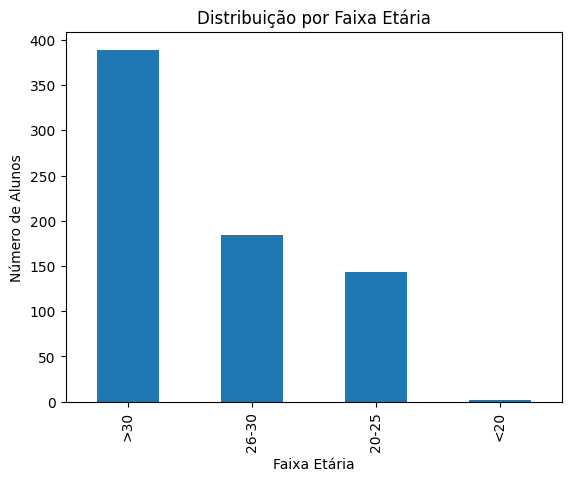

In [27]:
# Distribuição das faixas etárias
alunos["Faixa Etária"].value_counts().plot(kind="bar")
plt.title("Distribuição por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Alunos")
plt.show()

/tmp/ipykernel_49741/3583630886.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alunos.groupby("Faixa Etária")["Evasao"].mean().plot(kind="bar")


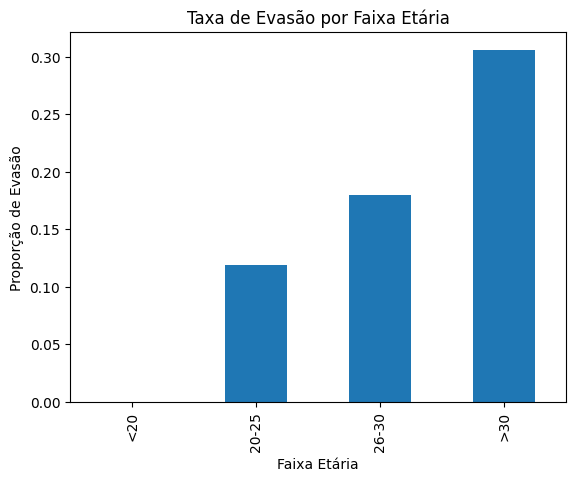

In [28]:
# Taxa de evasão por faixa etária
alunos.groupby("Faixa Etária")["Evasao"].mean().plot(kind="bar")
plt.title("Taxa de Evasão por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Proporção de Evasão")
plt.show()

## 2.2 - Proporção de evasão vs conclusão por perfil demográfico.

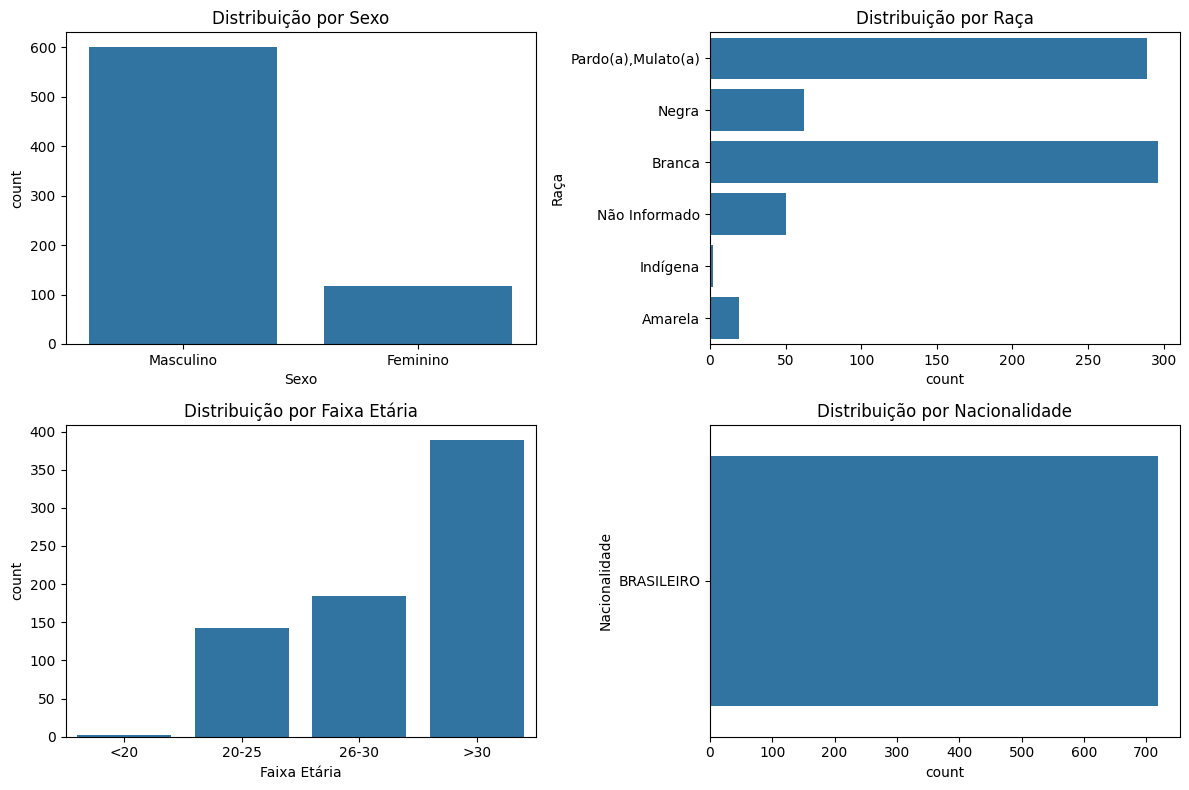

In [20]:
# Distribuições demográficas
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.countplot(data=alunos, x="Sexo", ax=axes[0,0])
axes[0,0].set_title("Distribuição por Sexo")
sns.countplot(data=alunos, y="Raça", ax=axes[0,1])
axes[0,1].set_title("Distribuição por Raça")
sns.countplot(data=alunos, x="Faixa Etária", ax=axes[1,0])
axes[1,0].set_title("Distribuição por Faixa Etária")
sns.countplot(data=alunos, y="Nacionalidade", ax=axes[1,1])
axes[1,1].set_title("Distribuição por Nacionalidade")
plt.tight_layout()
plt.show()

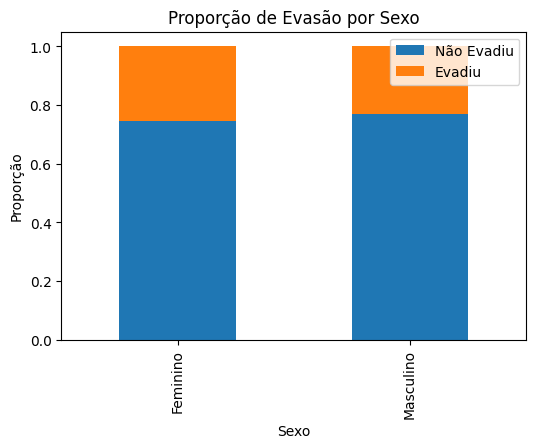

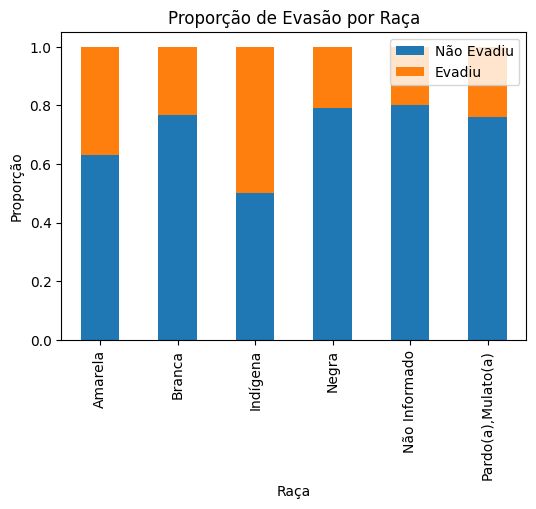

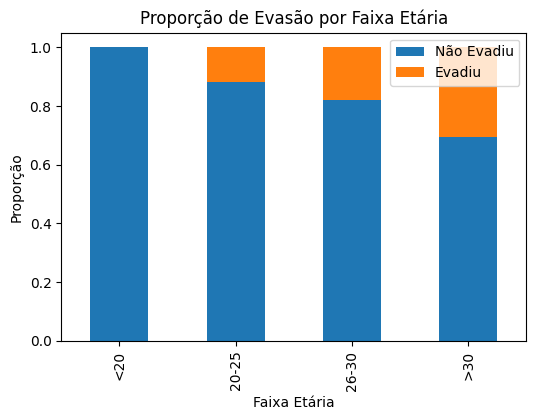

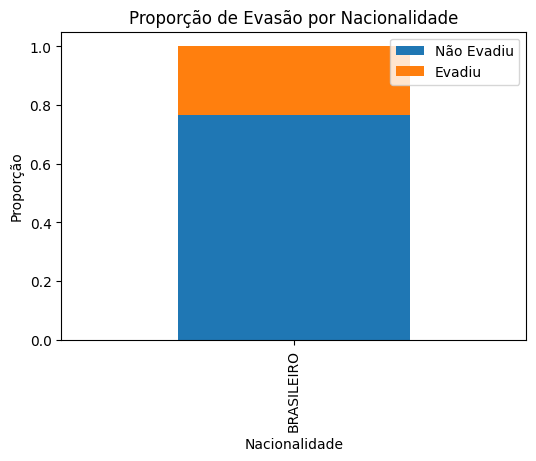

In [22]:
# Proporção evasão vs conclusão por perfil
for col in ["Sexo", "Raça", "Faixa Etária", "Nacionalidade"]:
    tabela = pd.crosstab(alunos[col], alunos["Evasao"], normalize="index")
    tabela.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.title(f"Proporção de Evasão por {col}")
    plt.ylabel("Proporção")
    plt.legend(["Não Evadiu", "Evadiu"])
    plt.show()


## 2.3 - Análise de correlação entre coeficiente de rendimento e evasão.

In [23]:
# Análise de correlação coeficiente de rendimento x evasão
# Separar grupos
evadidos = alunos[alunos["Evasao"]==1]["Coeficiente"].dropna()
concluintes = alunos[alunos["Evasao"]==0]["Coeficiente"].dropna()

In [24]:
# Estatísticas descritivas
print("Média Coeficiente Evadidos:", evadidos.mean())
print("Média Coeficiente Concluintes:", concluintes.mean())

Média Coeficiente Evadidos: 1.9529585798816569
Média Coeficiente Concluintes: 3.7453916211293263


In [25]:
# Teste t
stat, p_val = stats.ttest_ind(evadidos, concluintes, equal_var=False)
print(f"Teste t: stat={stat:.3f}, p-value={p_val:.3f}")

Teste t: stat=-9.464, p-value=0.000


In [26]:
# Correlação point-biserial
from scipy.stats import pointbiserialr
corr, p_corr = pointbiserialr(alunos["Evasao"], alunos["Coeficiente"].fillna(0))
print(f"Correlação point-biserial CR x Evasão: r={corr:.3f}, p={p_corr:.3f}")

Correlação point-biserial CR x Evasão: r=-0.294, p=0.000


<a id='teste'></a>
## 2. Testes estatísticos recomendados

<a id='media'></a>
### 5.1. Comparações de média
- **t-Teste de Student (independente)** → comparar coeficiente de rendimento médio entre **evadidos e concluintes.**

- **ANOVA (ou Kruskal–Wallis, se não normal)** → comparar rendimento entre diferentes **tipos de ingresso** ou **estruturas curriculares.**

<a id='associacao'></a>
### 5.2. Associação entre variáveis categóricas
- **Qui-quadrado de independência** → testar se **evasão está associada a sexo, raça, tipo de ingresso, estado civil.**

<a id='corr'></a>
### 5.3. Correlação
- **Correlação de Pearson** → entre coeficiente e número de faltas.

- **Spearman** → se a relação não for linear ou variáveis ordinais.

<a id='comp'></a>
### 5.4. Comparação de distribuições
- **Mann-Whitney U** → comparar coeficientes entre dois grupos (ex.: evadidos vs concluintes) quando não há normalidade.

- **Kolmogorov–Smirnov (K-S test)** → comparar distribuição de notas de disciplinas entre evadidos e concluintes.

<a id='model'></a>
### 5.5. Modelagem estatística
- **Regressão logística** → prever evasão a partir de variáveis demográficas + acadêmicas.

- **Análise de sobrevivência (Kaplan-Meier / Cox Regression)** → modelar o tempo até a evasão.